# 1. Introduction
Nama : Angelin Cathi Karlina  
Batch : 005  

- This <a href="https://archive.ics.uci.edu/ml/datasets/Student+Performance#">Student Performance Dataset</a> approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

- Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

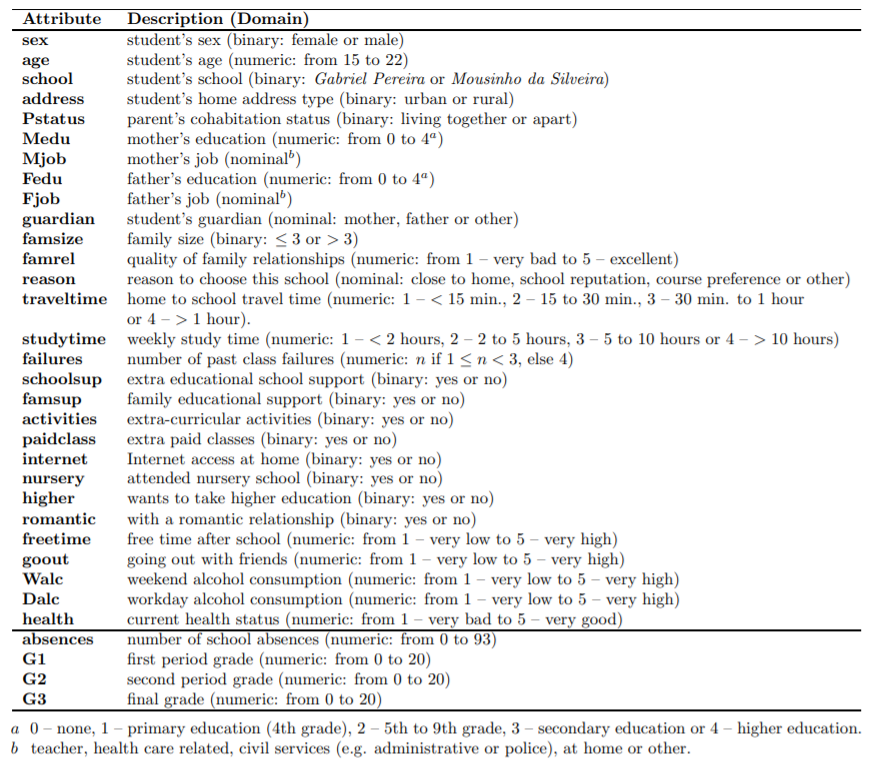


- Objectives : Memprediksi kelulusan siswa tanpa melibatkan fitur G1 dan G2

# 2. Import Modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [2]:
df_raw_mat = pd.read_csv('/Users/angel/Downloads/student/student-mat.csv', sep=';')
df_raw_por = pd.read_csv('/Users/angel/Downloads/student/student-por.csv', sep=';')

In [3]:
#load dataset mapel mtk
df_raw_mat.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [4]:
#load dataset mapel bhs.portugis
df_raw_por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


In [5]:
print(f'Dataset Matematika terdiri dari {df_raw_mat.shape[0]} baris dan {df_raw_mat.shape[1]} kolom')
print(f'Dataset bhs.Portugis terdiri dari {df_raw_por.shape[0]} baris dan {df_raw_por.shape[1]} kolom')

Dataset Matematika terdiri dari 395 baris dan 33 kolom
Dataset bhs.Portugis terdiri dari 649 baris dan 33 kolom


## Gabung Dataset

In [6]:
#tambah kolom `subject` untuk memberi identitas pada dataset setelah digabung
df_raw_mat['subject'] = ['math']*395
df_raw_por['subject'] = ['por']*649

In [7]:
#gabung kedua dataset
df_raw = pd.concat([df_raw_mat, df_raw_por])

In [8]:
df_raw

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,por
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,por
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,por
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,por


In [9]:
#deteksi data duplikat
print('banyaknya data terduplikasi :', df_raw.duplicated().sum())

banyaknya data terduplikasi : 0


In [10]:
pd.DataFrame(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

""


Dataset yang digunakan merupakan data dengan 16 data numerik (integer) dan 18 data objek.

In [11]:
#deskripsi statistik kolom numerik
df_raw.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- Usia rata-rata adalah 16-17 tahun dengan usia minimum 15 tahun sesuai dengan usia anak SMA pada umumnya. Usia maksimal adalah 22 tahun, yang mana harusnya sudah menempuh pendidikan lebih tinggi.
- kolom `Medu`, `Fedu`, `traveltime`, `studytime`, `failures`, `famrel`, `freetime`, `goout`, `Dalc`, `Walc`, dan `health` merupakan data kategorik dalam bentuk integer.
- Ketidak hadiran siswa (absen) rata-rata adalah 4 hari, dengan maksimal absen sebanyak 75 hari.
- Rata-rata pendidikan orang tua hanya setingkat tamat SD dan SMP (5th-9th grader)
- Rata-rata waktu belajar siswa sangat rendah (`studytime`).
- Rata-rata siswa bersekolah di tempat yang dekat dengan rumah (`travel`).
- Rata-rata siswa tidak terlalu banyak waktu luang setelah sekolah (`freetime`) dan jarang bepergian (`goout`).
- Konsumsi alkohol cukup rendah, rata-rata bernilai 1 (very low) baik utk konsumsi di hari kerja (`Dalc`) maupun akhir pekan (`Walc`)
- Rata-rata nilai siswa untuk `G1`, `G2`, dan `G3` adalah sekitar 11, yang mana berarti dalam skala 1-100 rata-rata nilai siswa hanya sekitar 55.

In [12]:
#deskripsi kolom numerik
df_raw.select_dtypes(object).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,por
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673,649


- Lebih banyak yang bersekolah di Gabriel Pereira
- Siswa perempuan sedikit lebih banyak daripada siswa laki-laki
- Siswa dari daerah urban(perkotaan) lebih banyak dari pada daerah rural(pedesaaan)
- Siswa dari keluarga dengan anggota lebih dari 3 orang lebih banyak daripada yang memiliki anggota keluarga kurang dari 3.
- Sangat banyak siswa yang memiliki akses internet di rumah dan berkeinginan melanjutkan ke pendidikan yang lebih tinggi.

---
---

# 4. Data Cleaning

## Missing Values

In [13]:
print(f'jumlah missing values : {df_raw.isnull().values.sum()}')

jumlah missing values : 0


- Tidak ditemukan missing values pada dataset.

## Outliers Detection

In [14]:
#golongkan dataframe menjadi dataframe numerik dan kategorik
df_num = df_raw[df_raw.select_dtypes('integer').columns]
df_cat = df_raw[df_raw.select_dtypes('object').columns]

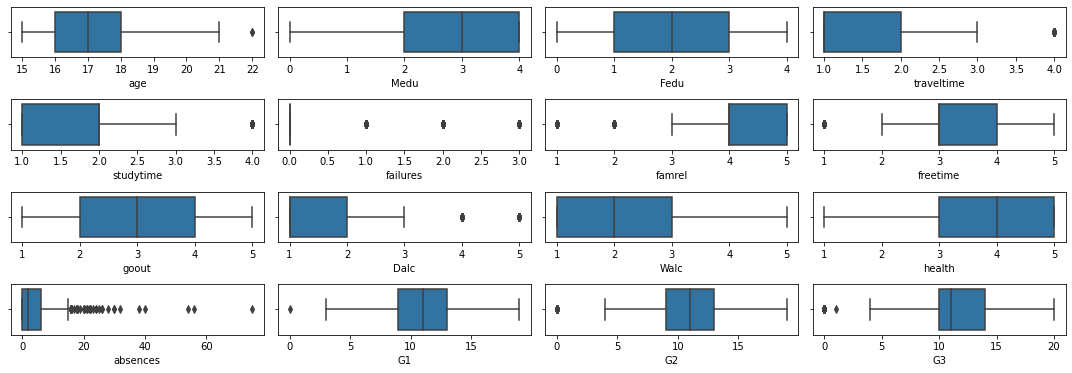

In [15]:
#visulisasi sebaran data
fig = plt.figure(figsize= (15,10))
for idx,col in enumerate(df_num.columns,1) :
    ax= fig.add_subplot(8,4,idx)
    sns.boxplot(x=df_num[col], ax=ax)

plt.tight_layout()

- Outliers tidak terlalu banyak
- Kolom `absences` terdapat cukup banyak outliers, maka akan dilakukan eksplorasi lebih lanjut sebelum melakukan treatment outliers.

In [16]:
df_raw[df_raw['absences']>40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11,math
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8,math
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9,math


- Siswa dengan absen di atas 40 hari memiliki nilai yang buruk.
- Outliers yang ada tidak dianggap sebagai data rusak/tidak masuk akal, maka tidak dilakukan treatment pada outliers. 

# 5. Data Exploration

## Distribusi Data

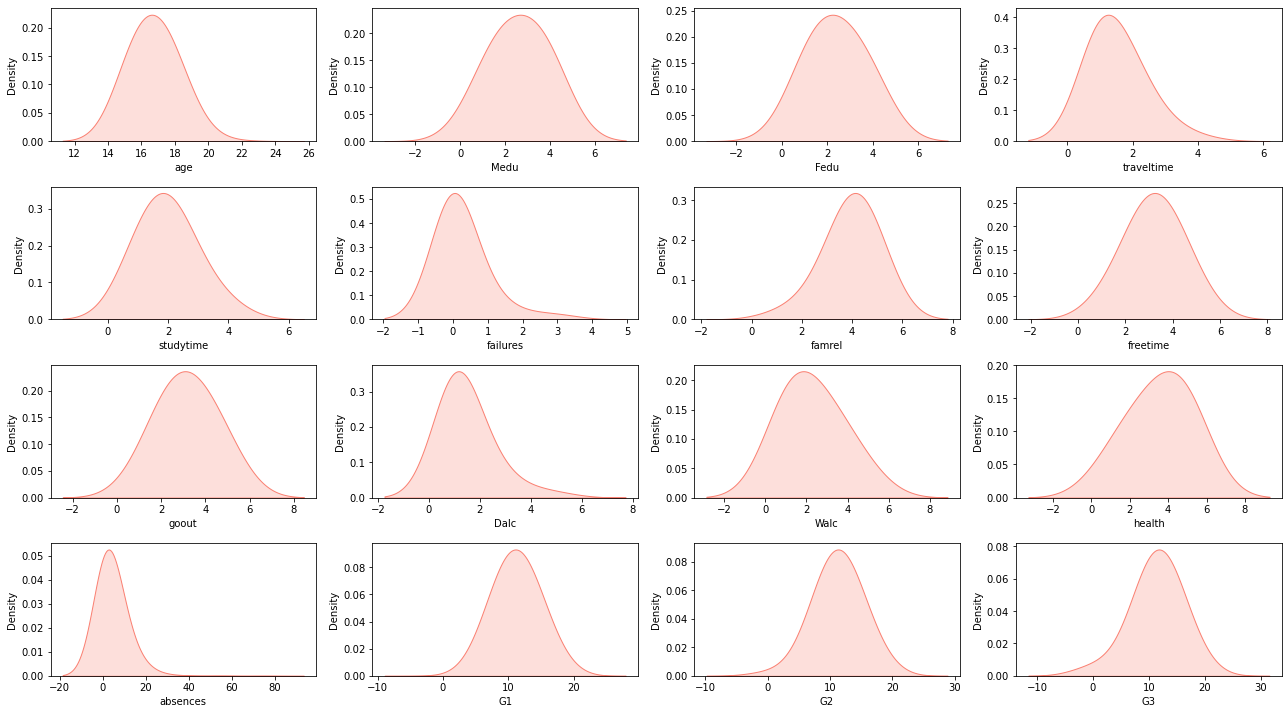

In [17]:
plt.figure(figsize=(18,10))
plotnumber= 1

for columns in df_num.columns:
    if plotnumber<=31:
        ax= plt.subplot(4,4, plotnumber)
        sns.kdeplot(df_num[columns], bw= 1, color='salmon', shade = True)
        plt.xlabel(columns, fontsize= 10)
    plotnumber += 1

plt.tight_layout()

- Sebagian besar data cenderung terdistribusi normal
- Data failure, traveltime, Dalc, dan absence skew ke kanan
- Data farmrel cenderung skew kiri

### Ekspolorasi Data Target

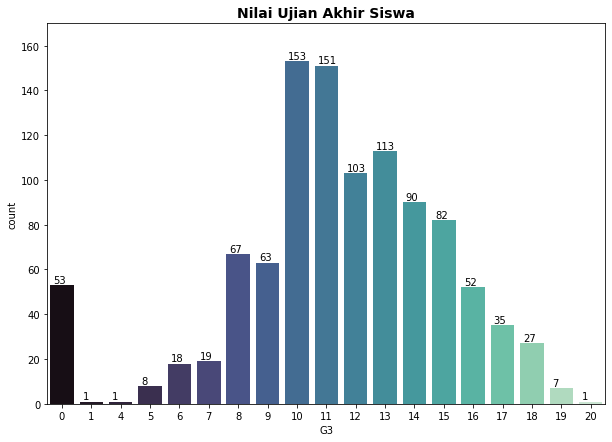

Jumlah Siswa = 1044


In [18]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x = 'G3', data = df_raw, palette= 'mako')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.title('Nilai Ujian Akhir Siswa', weight='bold').set_fontsize('14')
plt.ylim(0,170)
plt.show()
print(f'Jumlah Siswa = {df_raw.shape[0]}')

- Kebanyakan siswa mendapat nilai 10 dan 11
- Hanya 1 siswa yang mendapat nilai sempurna (20)
- Tidak ada siswa yang mendapat nilai 2 dan 3
- Sebanyak 53 siswa mendapat nilai 0

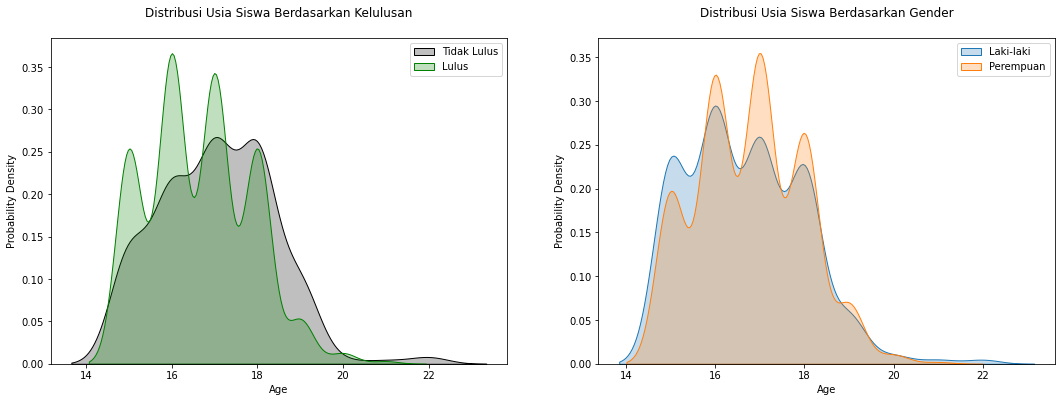

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6)) 
#distribusi usia siswa berdasarkan kelulusan
g1 = sns.kdeplot(df_raw['age'][df_raw['G3']<=9], color='black', shade = True, ax=ax[0])
g1 = sns.kdeplot(df_raw['age'][df_raw['G3']>9], color='green', shade = True, ax=ax[0])
g1.title.set_text('Distribusi Usia Siswa Berdasarkan Kelulusan\n')
g1.set_xlabel('Age')
g1.set_ylabel('Probability Density')
g1.legend(['Tidak Lulus', 'Lulus'])

#distribusi usia siswa berdasarkan kelulusan
g2 = sns.kdeplot(df_raw['age'][df_raw['sex']=='M'], shade = True, ax=ax[1])
g2 = sns.kdeplot(df_raw['age'][df_raw['sex']=='F'], shade = True, ax=ax[1])
g2.title.set_text('Distribusi Usia Siswa Berdasarkan Gender\n')
g2.set_xlabel('Age')
g2.set_ylabel('Probability Density')
g2.legend(['Laki-laki', 'Perempuan'])
plt.show()

- Siswa berusia di atas 18 tahun lebih banyak yang tidak lulus daripada yang lulus
- Siswa dengan nilai di atas standar kelulusan banyak yang berkisar di antara usia 16 tahun.
- Siswa Perempuan lebih banyak dari pada siswa laki-laki
- Siswa dengan usia 22 tahun merupakan siswa laki-laki
- Siswa berusia di bawah 16 tahun lebih banyak siswa laki-laki daripada perempuan.

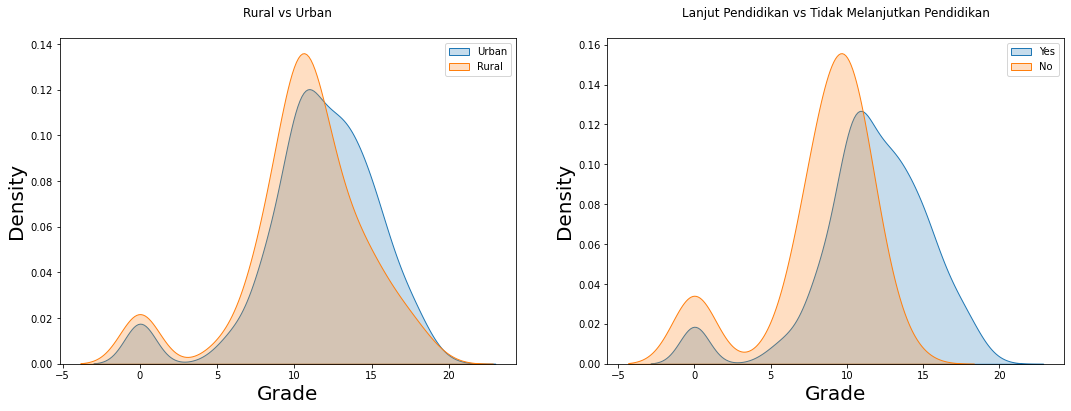

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
#apakah siswa dari daerah perkotaan lebih unggul?
g1 = sns.kdeplot(df_raw.loc[df_raw['address'] == 'U', 'G3'], label='Urban', shade = True, ax=ax[0])
g1 = sns.kdeplot(df_raw.loc[df_raw['address'] == 'R', 'G3'], label='Rural', shade = True, ax=ax[0])
g1.title.set_text('Rural vs Urban\n')
g1.set_xlabel('Grade', fontsize = 20)
g1.set_ylabel('Density', fontsize = 20)
g1.legend(['Urban', 'Rural'])

#apakah ada hubungan antara nilai dengan keinginan melanjutkan pendidikan?
g2 = sns.kdeplot(df_raw.loc[df_raw['higher'] == 'yes', 'G3'], label='Yes', shade = True, ax=ax[1])
g2 = sns.kdeplot(df_raw.loc[df_raw['higher'] == 'no', 'G3'], label='No', shade = True, ax=ax[1])
g2.title.set_text('Lanjut Pendidikan vs Tidak Melanjutkan Pendidikan\n')
g2.set_xlabel('Grade', fontsize = 20)
g2.set_ylabel('Density', fontsize = 20)
g2.legend(['Yes', 'No'])

plt.show()

- Lebih banyak siswa dari daerah perkotaan yang memiliki nilai ujian akhir yang baik daripada siswa dari daerah pedesaan.
- Siswa dengan nilai ujian memuaskan cenderung ingin melanjutkan pendidikan ke jenjang yang lebih tinggi

<AxesSubplot:ylabel='Mjob'>

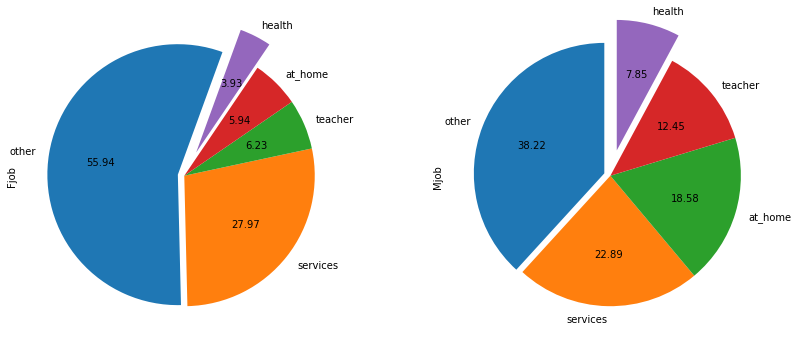

In [21]:
#pekerjaan orangtua siswa
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6)) 

df_raw['Fjob'].value_counts().plot.pie(autopct='%.2f', explode = [0.05,0,0,0,0.2], startangle=70, ax=ax[0])
df_raw['Mjob'].value_counts().plot.pie(autopct='%.2f', explode = [0.05,0,0,0,0.2], startangle=90, ax=ax[1])

Profil perkerjaan orang-tua siswa :
- Baik Ayah maupun Ibu siswa kebanyakan bekerja di sektor lain di luar pendidikan, services dan kesehatan.
- Pekerjaan paling sedikit adalah pada bidang kesehatan.
- Lebih banyak Ibu yang bekerja di rumah dari pada Ayah.

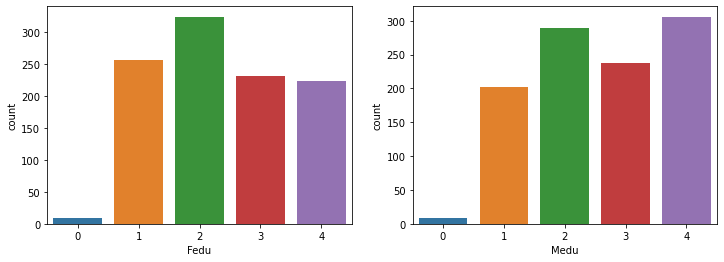

In [22]:
#visulisasi sebaran data pendidikan akhir orangtua siswa
fig = plt.figure(figsize= (12,4))
job = ['Fedu', 'Medu']
for idx,col in enumerate(job,1) :
    ax= fig.add_subplot(1,2,idx)
    sns.countplot(x = df_raw[col], ax=ax)


Profil pendidikan orang-tua siswa :
- Hanya sedikit orang-tua siswa yang tidak menempuh pendidikan formal.
- Sebagian besar orang tua siswa menamatkan pendidikan dasar
- Sebagian besar Ayah masuk golongan 2, yaitu menamatkan sekolah dasar atau sekolah menengah pertama.
- Lebih banyak Ibu yang menempuh pendidikan tinggi (label 4).

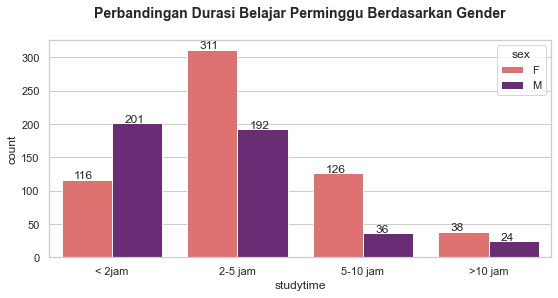

In [23]:
plt.figure(figsize=(9,4))
sns.set(style= 'whitegrid')

ax = sns.countplot(data = df_raw, x='studytime', hue = 'sex', palette= 'magma_r')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

plt.title('Perbandingan Durasi Belajar Perminggu Berdasarkan Gender\n', weight='bold').set_fontsize('14')
ax.set_xticklabels(['< 2jam', '2-5 jam', '5-10 jam', '>10 jam'])

plt.show()

- Lebih banyak siswa perempuan yang belajar di atas 2 jam perminggu.
- Lebih banyak siswa laki laki belajar kurang dari 2 jam perminggu dari pada perempuan.

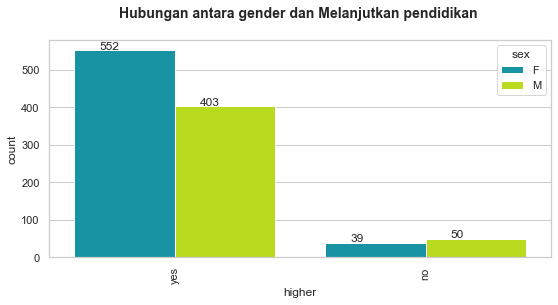

In [24]:
#eksplorasi data sex vs higher
plt.figure(figsize=(9,4))
sns.set(style= 'whitegrid')

ax = sns.countplot(data = df_raw, x='higher', hue = 'sex', palette= 'nipy_spectral')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

plt.title('Hubungan antara gender dan Melanjutkan pendidikan \n', weight='bold').set_fontsize('14')
plt.xticks(rotation=90)
plt.show()

- Perempuan lebih banyak yang ingin melanjutkan pendidikan tinggi
- Sebanyak 50 dari 453 siswa laki-laki tidak ingin melanjutkan pendidikan ke jenjang yang lebih tinggi.

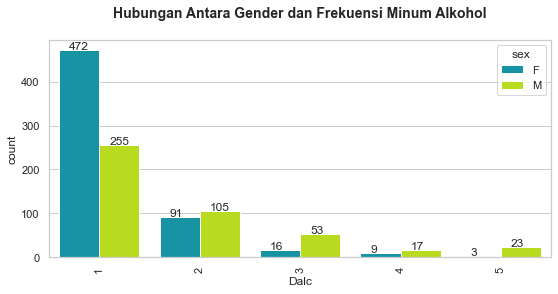

In [25]:
#eksplorasi data sex vs absence
plt.figure(figsize=(9,4))
sns.set(style= 'whitegrid')

ax = sns.countplot(data = df_raw, x='Dalc', hue = 'sex', palette= 'nipy_spectral')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

plt.title('Hubungan Antara Gender dan Frekuensi Minum Alkohol\n', weight='bold').set_fontsize('14')
plt.xticks(rotation=90)
plt.show()

- Sebagian besar siswa perempuan mengkonsumsi alkohol dalam jumlah rendah.
- Hanya 3 siswa perempuan yang mengkonsumsi alkohol dalam jumlah sangat tinggi.
- Cukup banyak siswa laki laki yang mengkonsumsi alkohol jumlah tinggi(label4) dan sangat tinggi(label 5)

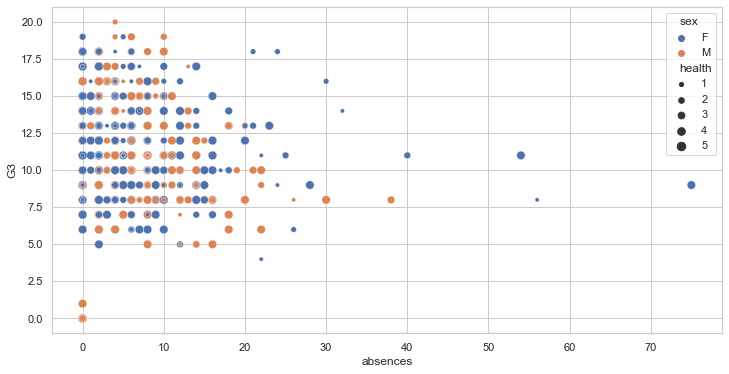

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_raw, x = 'absences',
               y = 'G3', hue = 'sex', size = 'health')
plt.show()

- Siswa yang sering absen (di atas 20 hari) kebanyakan adalah siswa perempuan.
- Faktor kesehatan dapat menjadi alasan dibalik ketidak hadiran siswa, namun tidak semua siswa yang tidak hadir memiliki kesehatan yang buruk.
- Siswa dengan nilai di atas 15 kebanyakan tidak absen lebih dari 20 hari, hanya 2 siswa bernilai di atas 15 yang absen di atas 20 hari dengan kesehatan yang kurang baik.

## Identify Special Case

>siswa gagal walaupun tidak pernah absen, sering belajar, orangtua tidak bercerai, salah satu orang tua tidak bekerja di luar rumah.

In [30]:
df_raw[(df_raw['absences']==0)&(df_raw['G3']<10)&(df_raw['studytime']>3)&((df_raw['Mjob']=='at_home')|(df_raw['Fjob']=='at_home'))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
334,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4,4,4,1,1,4,0,10,9,0,math


- Terdapat 1 siswa (index 334) yang meskipun tidak pernah absen, belajar lebih dari 10jam perminggu, tidak gagal dalam ujian sebelumnya, namun siswa ini mendapat nilai 0 pada ujian akhir.
- Siswa menkonsumsi alkohol dalam jumlah sangat rendah, tidak berpacaran, dan berkeinginan melanjutkan ke pendidikan tinggi.

- Kemungkinan hal ini dapat terjadi karena :
    - Orang tua siswa berpendidikan setaraf lulus SD/SMP.
    - Siswa tinggal di daerah pedesaan
    - Siswa tidak memiliki akses internet, memiliki banyak waktu luang setelah sekolah dan sering bepergian.

>Siswa absen lebih dari 2 minggu, belajar kurang dari 2jam perminggu, memperoleh nilai di atas 16.

In [28]:
df_raw[(df_raw['absences']>14)&(df_raw['G3']>16)&(df_raw['studytime']<2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
198,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18,math


- Terdapat 1 siswa (index 198) yang meskipun jarang belajar, ketidakhadiran siswa cukup banyak, dan kesehatannya kurang baik siswa memiliki nilai yang sangat baik.
- Terlihat bahwa siswa ini  memiliki kedua orang tua berpendidikan tinggi dan masih hidup bersama.
- Siswa tinggal di daerah perkotaan, memiliki akses internet, memiliki hubungan baik dengan keluarga, tidak berpacaran.

Text(0.5, 1.05, 'Spearman correlation of Features')

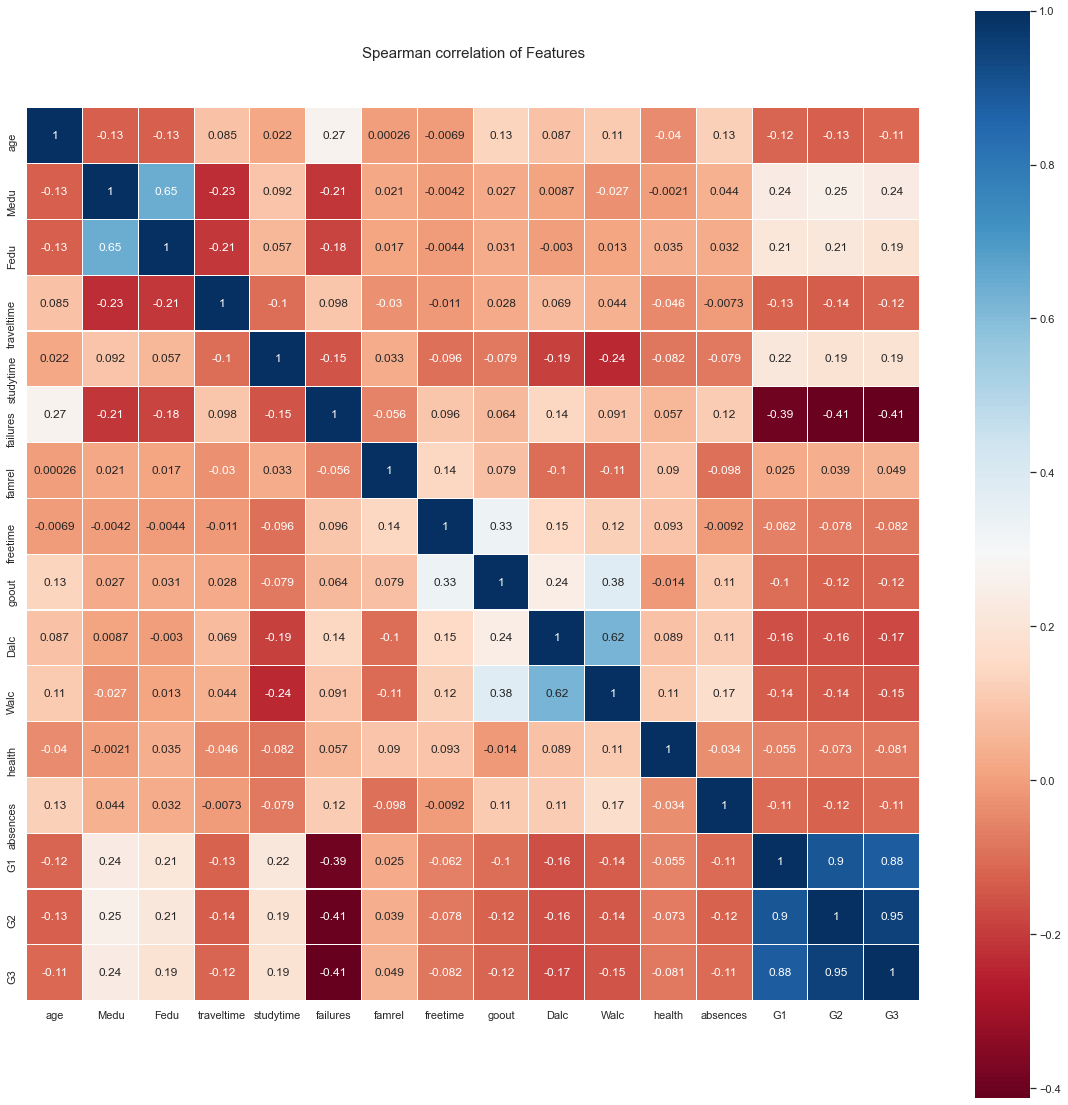

In [29]:
corr = df_raw.corr(method="spearman")

f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="RdBu", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Spearman correlation of Features", y=1.05, size=15)

- Terdapat banyak multicollinearity pada dataset, selanjutnya akan ditelaah lebih lanjut dengan VIF.

## VIF
### Drop Fitur G1 dan G2
Oleh karena G1 dan G2 sangat mempengaruhi nilai G3, maka G1 dan G2 akan didrop agar hasil prediksi model dilakukan sebelum siswa melakukan ujian apapun.

In [30]:
df_features = df_raw.drop(columns=['G1','G2','G3'])
#kolom G3 di drop karena merupakan target
#kolom G1 dan G2 di drop karena memiliki korelasi yang sanggat tinggi terhadap target

vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
features,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
VIF,46.691515,11.129154,9.847112,5.600423,7.05018,1.324467,19.240045,12.080669,11.472394,6.256394,8.096597,7.352308,1.603073


- Fitur `age` memiliki nilai VIF yang paling tinggi di antara fitur lain, fitur ini akan di drop pada tahap selanjutnya.

In [46]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7,8,9,10,11
features,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
VIF,10.885793,9.758015,4.98355,5.923209,1.268122,15.100703,11.575994,11.225447,6.223937,8.003487,7.010975,1.56425


- Terjadi penurunan skor VIF pada semua fitur setelah drop fitur `age`.
- Berdasarkan karakteristik informasi yang dibawa, fitur `Medu` dan `Fedu` kemungkinan memiliki keterkaitan yang tinggi.
- Fitur `famrel` memiliki VIF paling tinggi pada tahap ini, selanjutnya akan drop fitur `famrel` dan `Medu`

In [63]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age', 'famrel']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age','famrel']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7,8,9,10
features,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences
VIF,10.739842,9.704541,4.70585,5.557452,1.268015,10.621812,10.831605,6.223843,7.980659,6.410113,1.56326


In [60]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age', 'famrel', 'Medu']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age', 'famrel','Medu']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7,8,9
features,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences
VIF,5.314176,4.692928,5.336577,1.263699,10.523607,10.761998,6.194624,7.964951,6.392497,1.553147


- Sesuai dugaan sebelumnya, karena `Medu` dan `Fedu` memiliki informasi yang serupa, maka setelah drop fitur `Medu`, skor `Fedu` menurun drastis.
- Selanjutnya drop `goout` karna masih di atas threshold.

In [61]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age', 'Medu','famrel','goout']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age','Medu','famrel','goout']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7,8
features,Fedu,traveltime,studytime,failures,freetime,Dalc,Walc,health,absences
VIF,5.230865,4.610584,5.172669,1.262073,8.63343,6.192787,6.996392,6.39202,1.550494


- Drop fitur `freetime` karna skor VIF masih tinggi
- Drop `Walc` karna skor VIF masih relatif tinggi dan fitur ini memiliki kemiripan informasi dengan `Dalc`.

In [64]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age', 'Medu','famrel','goout','freetime']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age','Medu','famrel','goout','freetime']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6,7
features,Fedu,traveltime,studytime,failures,Dalc,Walc,health,absences
VIF,4.914088,4.393716,4.838613,1.238771,6.110392,6.885107,5.888378,1.550453


In [67]:
vif = pd.DataFrame()
vif['features'] = df_features.select_dtypes('number').drop(columns=['age', 'Medu','famrel','goout','freetime','Walc']).columns
vif['VIF'] = [variance_inflation_factor(df_features.select_dtypes('number').drop(columns=['age','Medu','famrel','goout','freetime','Walc']).values, i) for i in range(len(vif))]
vif.T

,0,1,2,3,4,5,6
features,Fedu,traveltime,studytime,failures,Dalc,health,absences
VIF,4.820889,4.319616,4.822709,1.236195,3.647865,5.682237,1.538084


- Setelah drop fitur dengan multicollinearity tinggi, gabungkan kembali dengan fitur kategorik.

In [71]:
df_raw_num = df_raw[['Fedu', 'traveltime', 'studytime','failures','Dalc','health','absences','G3']]
df_raw_cat = df_raw[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
           'subject']]
df_raw = pd.concat([df_raw_num,df_raw_cat], axis=1)
df_raw

,Fedu,traveltime,studytime,failures,Dalc,health,absences,G3,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
0,4,2,2,0,1,3,6,6,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,math
1,1,1,2,0,1,3,4,6,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,math
2,1,1,2,3,2,3,10,10,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,math
3,2,1,3,0,1,5,2,15,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,math
4,3,1,2,0,1,5,4,10,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,3,1,1,5,4,10,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no,por
645,1,1,2,0,1,1,4,16,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no,por
646,1,2,2,0,1,5,6,9,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no,por
647,1,2,1,0,3,2,6,10,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no,por


# 6. Data Preprocessing

## Train-test Split

In [72]:
df_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)

print('df_train shape :',df_train.shape)
print('df_test shape:',df_test.shape)

df_train shape : (835, 26)
df_test shape: (209, 26)


## Feature Engineering

### Binning Target - G3

In [73]:
#ubah target G3 jadi kategorikal-TRAIN
g3_cat = pd.cut(df_train['G3'],bins=[-1,10,20],labels=['Fail','Pass'])
df_train.insert(26,'target',g3_cat)

In [74]:
#ubah target G3 jadi kategorikal-TEST
g3_cat_tst = pd.cut(df_test['G3'],bins=[-1,10,20],labels=['Fail','Pass'])
df_test.insert(26,'target',g3_cat_tst)

## Encoding

In [76]:
#ambil fitur kategorik dalam bentuk string/object
objList = df_train.select_dtypes(include = "object").columns
print (objList)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'subject'],
      dtype='object')


In [77]:
#Label Encoding object menjadi numeric -TRAIN
str_cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
           'target','subject']

le = LabelEncoder()
for feat in str_cat:
    df_train[feat] = le.fit_transform(df_train[feat].astype(str))

df_train.head(3)

,Fedu,traveltime,studytime,failures,Dalc,health,absences,G3,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject,target
136,1,4,1,0,1,2,4,11,0,1,1,0,1,0,2,0,1,0,0,0,0,1,1,0,0,1,1
256,2,1,4,0,1,4,6,13,0,0,1,1,1,4,3,3,1,0,1,1,1,1,1,1,0,0,1
350,1,3,2,3,3,2,8,8,1,1,0,0,1,2,3,1,2,0,0,0,0,1,1,1,0,0,0


In [78]:
#Label Encoding object menjadi numeric - TEST
for feat in str_cat:
    df_test[feat] = le.fit_transform(df_test[feat].astype(str))

df_test.head(3)

,Fedu,traveltime,studytime,failures,Dalc,health,absences,G3,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject,target
576,2,2,1,0,5,5,8,11,1,1,0,0,1,2,2,0,1,0,1,0,0,0,1,1,0,1,1
280,1,2,1,0,2,5,30,8,0,1,1,1,0,3,2,1,1,0,0,1,1,1,1,1,1,0,0
141,1,4,2,0,1,3,0,13,0,0,0,0,1,0,2,0,1,0,1,0,0,1,1,0,0,1,1



### Drop Fitur G3 
Nilai pada G3 telah digantikan dengan kolom target

In [81]:
df_train = df_train.drop(['G3'], axis = 1)
df_test = df_test.drop(['G3'], axis = 1)

In [83]:
df_train.head(2)

,Fedu,traveltime,studytime,failures,Dalc,health,absences,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject,target
136,1,4,1,0,1,2,4,0,1,1,0,1,0,2,0,1,0,0,0,0,1,1,0,0,1,1
256,2,1,4,0,1,4,6,0,0,1,1,1,4,3,3,1,0,1,1,1,1,1,1,0,0,1


- Setelah drop fitur-fitur yang memiliki multicollinearity yang tinggi dan melakukan encoding, dataframe ini yang kemudian yang akan digunakan dalam pemodelan machine learning.

### Cek Perbandingan Data Target

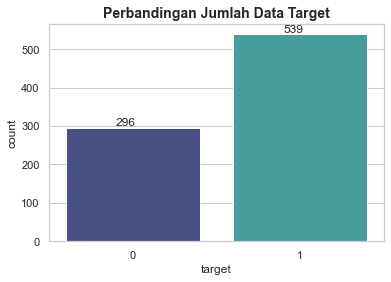

In [84]:
ax = sns.countplot(x = 'target', data = df_train, palette= 'mako')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

plt.title('Perbandingan Jumlah Data Target', weight='bold').set_fontsize('14')
plt.show()

Proporsi dari tiap label pada target berada pada rasio sekitar 1:2, sehingga masuk kategori 'slightly imbalance' yang tidak memerlukan tindakan lebih lanjut.

## Split Data Train dan Test dalam X dan y

In [85]:
X_train = df_train.drop('target', axis = 1)
y_train = df_train['target']
X_test = df_test.drop('target', axis = 1)
y_test = df_test['target']

# 7. Model Definition

## Base Model
Sebelum menentukan model mana yang akan digunakan, langkah pertama yang akan dilakukan adalah menguji beberapa base-model (tanpa hyperparameter) yang selanjutnya akan dipilih berdasarkan peforma yang dihasilkan tiap base-model.

In [88]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('clf', LogisticRegression()) 
])


clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(BaggingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.023999691009521484
fit_time  std  0.013534187164607147
score_time  mean  0.008202028274536134
score_time  std  0.009407848233235197
test_score  mean  0.7413173652694611
test_score  std  0.011611209239320509
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.07299609184265136
fit_time  std  0.018974469840091178
score_time  mean  0.044001102447509766
score_time  std  0.013742024017600543
test_score  mean  0.7365269461077845
test_score  std  0.0037871588744531437
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.010798931121826172
fit_time  std  0.002713244187295299
score_time  mean  0.0203981876373291
score_time  std  0.0030731326914038054
test_score  mean  0.6970059880239521
test_score  std  0.010440476511474638
---------------------------------
DecisionTreeClassif

Dari hasil percobaan beberapa base model di atas, dipilih model berikut untuk dilakukan random search cv :  
    - Logistic Regression  
    - SVC  
    - Random Forest Classifier  
    - Gradient Boosting  

## Pipeline
Sebelum melakukan radom search cv, terlebih dahulu akan dibuat pipeline untuk tiap model yang telah dipilih agar menyederhanakan tahapan pemodelan.

In [89]:
#logistic regression pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LogisticRegression()) 
])

#random forest pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier()) 
])

#gradient boost pipeline
pipe_gb = Pipeline([
    ('scaler', StandardScaler()), 
    ('gb', GradientBoostingClassifier()) 
])

#svc pipeline
pipe_svc = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC()) 
])


## Randomized Search CV - LogisticRegression

In [90]:
#norm of the penalty
penalty =['l1','l2']
#Inverse of regularization strength
C = [0.1, 1, 10, 50, 100]
#Algorithm to use in the optimization problem
solver = ['lbfgs', 'liblinear', 'newton-cg']

# Create the random grid
random_grid_lr = {'lr__penalty': penalty, 'lr__C': C, 'lr__solver': solver}
print(random_grid_lr)

{'lr__penalty': ['l1', 'l2'], 'lr__C': [0.1, 1, 10, 50, 100], 'lr__solver': ['lbfgs', 'liblinear', 'newton-cg']}


In [91]:
lr_randomcv = RandomizedSearchCV(pipe_lr, param_distributions=random_grid_lr, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
lr_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('lr', LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'lr__C': [0.1, 1, 10, 50, 100],
                                        'lr__penalty': ['l1', 'l2'],
                                        'lr__solver': ['lbfgs', 'liblinear',
                                                       'newton-cg']},
                   random_state=42, verbose=2)

In [92]:
lr_randomcv.best_params_

{'lr__solver': 'liblinear', 'lr__penalty': 'l1', 'lr__C': 0.1}

In [93]:
best_lr_random = lr_randomcv.best_estimator_

In [95]:
y_pred_lr = best_lr_random.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[ 43  44]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.59        87
           1       0.71      0.87      0.78       122

    accuracy                           0.71       209
   macro avg       0.72      0.68      0.68       209
weighted avg       0.72      0.71      0.70       209



## Randomized Search CV - RandomForest Classifier

In [98]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid_rf = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
              'rf__criterion':['entropy','gini']}
print(random_grid_rf)

{'rf__n_estimators': [10, 114, 219, 324, 428, 533, 638, 743, 847, 952, 1057, 1162, 1266, 1371, 1476, 1581, 1685, 1790, 1895, 2000], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'rf__min_samples_split': [2, 5, 10, 15], 'rf__min_samples_leaf': [1, 2, 4, 6, 8], 'rf__criterion': ['entropy', 'gini']}


In [99]:
rf_randomcv = RandomizedSearchCV(pipe_rf, param_distributions=random_grid_rf, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rf__criterion': ['entropy', 'gini'],
                                        'rf__max_depth': [10, 120, 230, 340,
                                                          450, 560, 670, 780,
                                                          890, 1000],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': [1, 2, 4, 6, 8],
                                        'rf__min_samples_split': [2, 5, 10, 15],
                                        'rf__n_estimators': [10, 114, 219, 324,
                                                             428, 533, 638, 743,
    

In [100]:
rf_randomcv.best_params_

{'rf__n_estimators': 1162,
 'rf__min_samples_split': 15,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'log2',
 'rf__max_depth': 780,
 'rf__criterion': 'gini'}

In [101]:
best_rf_random = rf_randomcv.best_estimator_

In [102]:
y_pred_rf = best_rf_random.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 48  39]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        87
           1       0.73      0.88      0.80       122

    accuracy                           0.74       209
   macro avg       0.75      0.71      0.72       209
weighted avg       0.74      0.74      0.73       209



## Randomized Search CV - Gradient Boosting

In [114]:
#The number of estimators as selected by early stopping
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 20)]
#shrinks the contribution of each tree 
learning_rate = [0.001, 0.01, 0.1]
# fraction of samples to be used for fitting the individual base learners.
subsample = [0.5, 0.7, 1.0, 1.5]
#The maximum depth of the individual regression estimators. 
max_depth = [2, 5, 7, 9]
# number of features to consider when looking for the best split.
max_features = [2, 5, 7]

# Create the random grid
random_grid_gb = {'gb__n_estimators': n_estimators,
                  'gb__learning_rate': learning_rate,
                  'gb__subsample': subsample,
                  'gb__max_depth': max_depth,
                  'gb__max_features' : max_features}
print(random_grid_gb)

{'gb__n_estimators': [50, 152, 255, 357, 460, 563, 665, 768, 871, 973, 1076, 1178, 1281, 1384, 1486, 1589, 1692, 1794, 1897, 2000], 'gb__learning_rate': [0.001, 0.01, 0.1], 'gb__subsample': [0.5, 0.7, 1.0, 1.5], 'gb__max_depth': [2, 5, 7, 9], 'gb__max_features': [2, 5, 7]}


In [115]:
gb_randomcv = RandomizedSearchCV(pipe_gb, param_distributions=random_grid_gb, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
gb_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('gb',
                                              GradientBoostingClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.001, 0.01, 0.1],
                                        'gb__max_depth': [2, 5, 7, 9],
                                        'gb__max_features': [2, 5, 7],
                                        'gb__n_estimators': [50, 152, 255, 357,
                                                             460, 563, 665, 768,
                                                             871, 973, 1076,
                                                             1178, 1281, 1384,
                                                             1486, 1589, 1692,
                                                             1794, 1897, 2000],
                            

In [116]:
gb_randomcv.best_params_

{'gb__subsample': 0.5,
 'gb__n_estimators': 152,
 'gb__max_features': 7,
 'gb__max_depth': 2,
 'gb__learning_rate': 0.1}

In [117]:
best_gb_random = gb_randomcv.best_estimator_

In [118]:
y_pred_gb = best_gb_random.predict(X_test)
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

[[ 48  39]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        87
           1       0.73      0.88      0.80       122

    accuracy                           0.74       209
   macro avg       0.75      0.71      0.72       209
weighted avg       0.74      0.74      0.73       209



## Randomized Search CV - SVC

In [108]:
#kernel type
kernel = ['linear', 'rbf', 'poly']
#Regularization parameter
C = [100, 10, 1.0, 0.1]
#Kernel coefficient for rbf and poly
gamma = [0.1, 1, 10, 100]


# Create the random grid
random_grid_svc = {'svc__kernel': kernel,
                  'svc__C': C,
                  'svc__gamma': gamma}
print(random_grid_svc)

{'svc__kernel': ['linear', 'rbf', 'poly'], 'svc__C': [100, 10, 1.0, 0.1], 'svc__gamma': [0.1, 1, 10, 100]}


In [109]:
svc_randomcv = RandomizedSearchCV(pipe_svc, param_distributions=random_grid_svc, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
svc_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svc__C': [100, 10, 1.0, 0.1],
                                        'svc__gamma': [0.1, 1, 10, 100],
                                        'svc__kernel': ['linear', 'rbf',
                                                        'poly']},
                   random_state=42, verbose=2)

In [110]:
svc_randomcv.best_params_

{'svc__kernel': 'linear', 'svc__gamma': 0.1, 'svc__C': 100}

In [111]:
best_svc_random = svc_randomcv.best_estimator_

In [112]:
y_pred_svc = best_svc_random.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[ 42  45]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.75      0.48      0.59        87
           1       0.71      0.89      0.79       122

    accuracy                           0.72       209
   macro avg       0.73      0.68      0.69       209
weighted avg       0.72      0.72      0.70       209



### Hasil RandomSearch:
- Oleh karena tujuan dari pemodelan ini adalah untuk memprediksi kelulusan siswa maka metric recall akan lebih dipertimbangkan daripada precision, hal ini guna mendapat tindakan antisipasi dari pihak sekolah terhadap siswa yang diprediksi tidak lulus.
- logistic regression :
    - acc 0.71
    - recall 0 = 0.49
- random forest :
    - acc 0.74
    - recall 0 = 0.55
- gradient boosting :
    - acc 0.74
    - recall 0 = 0.55
- svc :
    - acc 0.72
    - recall 0 = 0.48
- Untuk setiap nilai precision label 0 dan 1 serta recall label 1, keempat model memiliki skor cukup baik.
- Berdasarkan akurasi dan recall label 0, random forest dan gradient boosting memperoleh skor yang sama.
- Selanjutnya akan dilakuakn gridsearch untuk gradient boosting dan random forest.

# 8. Model Training

## Grid Search - Gradient Boosting Classifier

In [140]:
param_grid_gb = {
    'gb__n_estimators': [gb_randomcv.best_params_['gb__n_estimators'],
                        gb_randomcv.best_params_['gb__n_estimators']+30,
                        gb_randomcv.best_params_['gb__n_estimators']+40,
                        gb_randomcv.best_params_['gb__n_estimators']-20,
                        gb_randomcv.best_params_['gb__n_estimators']-30,
                        gb_randomcv.best_params_['gb__n_estimators']-40],
    
    'gb__learning_rate': [gb_randomcv.best_params_['gb__learning_rate'],
                          gb_randomcv.best_params_['gb__learning_rate']+0.1,
                          gb_randomcv.best_params_['gb__learning_rate']+0.3,
                          gb_randomcv.best_params_['gb__learning_rate']/2],  
    
    'gb__subsample': [gb_randomcv.best_params_['gb__subsample'],
                      gb_randomcv.best_params_['gb__subsample']+0.1,
                      gb_randomcv.best_params_['gb__subsample']-0.1,
                      gb_randomcv.best_params_['gb__subsample']-0.2],
    'gb__max_depth': [gb_randomcv.best_params_['gb__max_depth'],
                      gb_randomcv.best_params_['gb__max_depth']+1,
                      gb_randomcv.best_params_['gb__max_depth']+2,
                      gb_randomcv.best_params_['gb__max_depth']-1],
    'gb__max_features' : [gb_randomcv.best_params_['gb__max_features'],
                          gb_randomcv.best_params_['gb__max_features']+1,
                          gb_randomcv.best_params_['gb__max_features']+2,
                          gb_randomcv.best_params_['gb__max_features']+3]

}

print(param_grid_gb)

{'gb__n_estimators': [152, 162, 172, 182, 192, 142, 132, 122, 112], 'gb__learning_rate': [0.1, 0.2, 0.4, 0.05], 'gb__subsample': [0.5, 0.6, 0.4, 0.3], 'gb__max_depth': [2, 3, 4, 1], 'gb__max_features': [7, 8, 9, 10]}


In [141]:
grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, verbose=2, n_jobs=-1)
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.1, 0.2, 0.4, 0.05],
                         'gb__max_depth': [2, 3, 4, 1],
                         'gb__max_features': [7, 8, 9, 10],
                         'gb__n_estimators': [152, 162, 172, 182, 192, 142, 132,
                                              122, 112],
                         'gb__subsample': [0.5, 0.6, 0.4, 0.3]},
             verbose=2)

In [142]:
grid_gb.best_params_

{'gb__learning_rate': 0.05,
 'gb__max_depth': 2,
 'gb__max_features': 10,
 'gb__n_estimators': 132,
 'gb__subsample': 0.4}

In [143]:
best_grid_gb = grid_gb.best_estimator_

## Grid Search - Random Forest Classifier

In [148]:
param_grid_rf = {
    'rf__criterion': [rf_randomcv.best_params_['rf__criterion']],
    'rf__max_depth': [rf_randomcv.best_params_['rf__max_depth']],
    'rf__max_features': [rf_randomcv.best_params_['rf__max_features']],
    
    'rf__min_samples_leaf': [rf_randomcv.best_params_['rf__min_samples_leaf'], 
                             rf_randomcv.best_params_['rf__min_samples_leaf']+2, 
                             rf_randomcv.best_params_['rf__min_samples_leaf'] + 4],
    
    'rf__min_samples_split': [rf_randomcv.best_params_['rf__min_samples_split'] - 2,
                              rf_randomcv.best_params_['rf__min_samples_split'] - 1,
                              rf_randomcv.best_params_['rf__min_samples_split'], 
                              rf_randomcv.best_params_['rf__min_samples_split'] +1,
                              rf_randomcv.best_params_['rf__min_samples_split'] + 2],
    
    'rf__n_estimators': [rf_randomcv.best_params_['rf__n_estimators'] - 200, 
                         rf_randomcv.best_params_['rf__n_estimators'] - 100, 
                         rf_randomcv.best_params_['rf__n_estimators'], 
                         rf_randomcv.best_params_['rf__n_estimators'] + 100,
                         rf_randomcv.best_params_['rf__n_estimators'] + 200]
}

print(param_grid_rf)

{'rf__criterion': ['gini'], 'rf__max_depth': [780], 'rf__max_features': ['log2'], 'rf__min_samples_leaf': [1, 3, 5], 'rf__min_samples_split': [13, 14, 15, 16, 17], 'rf__n_estimators': [962, 1062, 1162, 1262, 1362]}


In [149]:
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini'], 'rf__max_depth': [780],
                         'rf__max_features': ['log2'],
                         'rf__min_samples_leaf': [1, 3, 5],
                         'rf__min_samples_split': [13, 14, 15, 16, 17],
                         'rf__n_estimators': [962, 1062, 1162, 1262, 1362]},
             verbose=2)

In [150]:
grid_rf.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 780,
 'rf__max_features': 'log2',
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 13,
 'rf__n_estimators': 962}

In [151]:
best_grid_rf = grid_rf.best_estimator_

# 9. Model Evaluation

## Gradient Boosting Classification's Model Evaluation

#### Confusion Matrix

In [154]:
y_pred_ggb = best_grid_gb.predict(X_test)
conf_matrix = confusion_matrix(y_test,  y_pred_ggb)
conf_matrix

array([[ 45,  42],
       [ 17, 105]], dtype=int64)

In [155]:
print('\n-----------Confusion Matrix-----------')
print('True Positive = ', conf_matrix[0,0])
print('True Negative = ', conf_matrix[1,1])
print('False Positive (Type 1 Error) = ', conf_matrix[0,1])
print('False Negative (Type 2 Error) = ', conf_matrix[1,0])

print('\n------------Hasil Prediksi------------')
true_pred = conf_matrix[0,0] + conf_matrix[1,1]
false_pred = conf_matrix[0,1] + conf_matrix[1,0]
print('Prediksi benar =', true_pred)
print('Prediksi salah =', false_pred)

print('Persentase Prediksi Benar =', round((true_pred)*100/(true_pred + false_pred),2), '%')


-----------Confusion Matrix-----------
True Positive =  45
True Negative =  105
False Positive (Type 1 Error) =  42
False Negative (Type 2 Error) =  17

------------Hasil Prediksi------------
Prediksi benar = 150
Prediksi salah = 59
Persentase Prediksi Benar = 71.77 %


#### Additional Metrics

In [156]:
# Bandingkan train dan test score

print('Training set score: ', round(best_grid_gb.score(X_train, y_train) * 100, 2), '%')
print('Test set score: ', round(best_grid_gb.score(X_test, y_test) * 100, 2), '%')

# Hitung null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print('Null Accuracy score: ', round(null_accuracy * 100, 2), '%')

Training set score:  77.37 %
Test set score:  71.77 %
Null Accuracy score:  41.63 %


#### Classification Report

In [157]:
print(classification_report(y_test, y_pred_ggb))

              precision    recall  f1-score   support

           0       0.73      0.52      0.60        87
           1       0.71      0.86      0.78       122

    accuracy                           0.72       209
   macro avg       0.72      0.69      0.69       209
weighted avg       0.72      0.72      0.71       209



## Random Forest Classification's Model Evaluation

#### Confusion Matrix

In [158]:
y_pred_grf = best_grid_rf.predict(X_test)
conf_matrix = confusion_matrix(y_test,  y_pred_grf)
conf_matrix

array([[ 46,  41],
       [ 15, 107]], dtype=int64)

In [159]:
print('\n-----------Confusion Matrix-----------')
print('True Positive = ', conf_matrix[0,0])
print('True Negative = ', conf_matrix[1,1])
print('False Positive (Type 1 Error) = ', conf_matrix[0,1])
print('False Negative (Type 2 Error) = ', conf_matrix[1,0])

print('\n------------Hasil Prediksi------------')
true_pred = conf_matrix[0,0] + conf_matrix[1,1]
false_pred = conf_matrix[0,1] + conf_matrix[1,0]
print('Prediksi benar =', true_pred)
print('Prediksi salah =', false_pred)

print('Persentase Prediksi Benar =', round((true_pred)*100/(true_pred + false_pred),2), '%')


-----------Confusion Matrix-----------
True Positive =  46
True Negative =  107
False Positive (Type 1 Error) =  41
False Negative (Type 2 Error) =  15

------------Hasil Prediksi------------
Prediksi benar = 153
Prediksi salah = 56
Persentase Prediksi Benar = 73.21 %


#### Additional Metrics

In [160]:
# Bandingkan train dan test score

print('Training set score: ', round(best_grid_rf.score(X_train, y_train) * 100, 2), '%')
print('Test set score: ', round(best_grid_rf.score(X_test, y_test) * 100, 2), '%')

# Hitung null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print('Null Accuracy score: ', round(null_accuracy * 100, 2), '%')

Training set score:  84.31 %
Test set score:  73.21 %
Null Accuracy score:  41.63 %


#### Classification Report

In [161]:
print(classification_report(y_test, y_pred_grf))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        87
           1       0.72      0.88      0.79       122

    accuracy                           0.73       209
   macro avg       0.74      0.70      0.71       209
weighted avg       0.74      0.73      0.72       209



## Gradient Boosting Classifier vs Random Forest Classifier

In [180]:
class_report

,GradientBoost_0,GradientBoost_1,RandomForest_0,RandomForest_1
precision,0.750000,0.718121,0.766667,0.724832
recall,0.517241,0.877049,0.528736,0.885246
f1,0.612245,0.789668,0.625850,0.797048
support,87.000000,122.000000,87.000000,122.000000


- Baik dari nilai precision, recall, maupun f1, model Random Forest memiliki hasil yang lebih baik daripada Gradient Boosting.

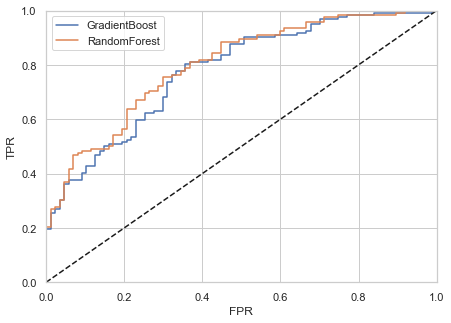

In [173]:
models=[best_grid_gb, best_grid_rf]
for mod in models:
    mod.fit(X_train,y_train)
    
y_pred=[mod.predict(X_test) for mod in models]
scores=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores]


class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['GradientBoost', 'RandomForest']
for i,pred in enumerate(y_pred):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(df_test['target'].unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(7,5))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()    

- Pada ROC curve, tampak bahwa RandomForest memiliki performansi yang lebih baik bila dibandingkan dengan GradientBoost.

# 10. Model Saving

- Berdasarkan hasil evaluasi model, maka model akhir yang akan digunakan adalah RandomForestClassifier dengan hyperparameter sebagai berikut :
    - criterion : 'gini'
    - max_depth = 780
    - max_features = 'log2'
    - min_samples_leaf = 3,
    - min_samples_split = 13,
    - n_estimators = 962

In [239]:
# save the model 

filename = 'finalized_model.pkl'
pickle.dump(best_grid_rf, open(filename, 'wb'))

In [240]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7368421052631579


# 11. Model Inference

### Label Encoder Mapping
Sebelum membuat sampel data baru, cari tahu terlebih dahulu mapping dari hasil label encoder

In [195]:
le.fit(df_raw['Mjob'])
jobmap = dict(zip(le.classes_, le.transform(le.classes_)))
print(jobmap)

{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}


In [198]:
le.fit(df_raw['address'])
add_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(add_map)

{'R': 0, 'U': 1}


In [203]:
le.fit(df_raw['sex'])
sex_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(sex_map)

{'F': 0, 'M': 1}


### Buat Sampel Data Baru

In [219]:
get_sampledata = X_train.iloc[[60]]
get_sampledata

,Fedu,traveltime,studytime,failures,Dalc,health,absences,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
370,2,2,2,2,1,3,4,1,0,1,1,1,3,3,1,2,0,0,0,1,1,1,0,1,0


In [226]:
new_data = [[2,  1,  4,  0,  1,  4,  12, 1,  0,  0,  1,  0,  2,  1,  2, 0, 1, 1, 1,  1,  1,  1,  1,  1,  0],
            [0,  4,  2,  2,  4,  2,  22, 1,  0,  1,  1,  0,  0,  1,  2, 0, 1, 1, 1,  1,  1,  0,  1,  1,  0]]

new_data

[[2, 1, 4, 0, 1, 4, 12, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 4, 2, 2, 4, 2, 22, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]]

In [228]:
for data in new_data:
    result = best_grid_rf.predict([data])
    if(result==1):
        print('Pass')
    else :
        print('Fail')

Pass
Fail


# 12. Conclusions

## Model Analysis
- Ujicoba dilakukan dengan 7 base models yang kemudian menghasilkan 4 model dengan performansi terbaik yaitu logistic regression, svc, random forest, dan gradient boosting.
- Setelah melakukan random search cv, random forest dan gradient boosting memberikan performa terbaik dengan nilai akurasi 0.74 dan macro average precision dan recall tiap label berada di atas 0.7.
- Setelah melakukan hyperparameter tuning dengan gridsearchcv :
    - gradient boosting memberikan hasil yang kurang memuaskan. hal ini ditunjukkan dengan nilai accuray, precision dan recall yang menurun dari hasil sebelumnya.
    - random forest memberikan hasil yang lebih baik dari yang sebelumnya.
- Model akhir yang digunakan pada dataset ini adalah Random Forest Classification dengan hyperparameter sebagai berikut:
    - criterion : 'gini'
    - max_depth = 780
    - max_features = 'log2'
    - min_samples_leaf = 3,
    - min_samples_split = 13,
    - n_estimators = 962
- Model ini memperoleh akurasi 73% dengan macro average precision sebesar 74% dan recall 70%.
- Random Forest Classifiers menjadi model terbaik untuk dataset ini dengan alasan sebagai berikut:
    - Random Forests cenderung tidak overfitting. Testing performance dari Random Forests tidak mengalami penurunan yang biasanya diakibatkan oleh overfitting seiring dengan bertambahnya 'tree'. Di sisi lain, gradient boosting memiliki kecenderungan overfitting.
    - Data yang digunakan bukan data imbalance, biasanya gradient boosting menghasilkan model yang baik pada data imbalance.
    - Jumlah data yang digunakan dalam pemodelan tidak terlalu banyak, sehingga untuk model gradient boosting yang memerlukan banyak data dalam training model tidak memberikan performa maksimal. Di sisi lain, random forest dapat memberikan performa yang baik untuk dataset yang besar maupun sedikit.
    - Random forest memerlukan waktu training yang lebih sedikit bila dibandingkan dengan gradient boosting.
    
    
## Overall Analysis
- Siswa pada kedua sekolah memiliki cukup banyak siswa yang nilainya dibawah standar kelulusan, sehingga prediksi mengenai kelulusan siswa pada kedua sekolah ini diperlukan agar siswa yang berpotensi tidak lulus dapat segera ditangani dengan baik oleh pihak sekolah maupun wali siswa.
- Sampel data yang digunakan merupakan siswa bahasa portugis dan matematika, dengan proporsi siswa perempuan lebih banyak daripada laki-laki. Siswa perempuan diketahui lebih banyak yang ingin melanjutkan pendidikan tinggi, durasi belajar mandiri perminggu lebih banyak daripada siswa laki-laki, dan mengkonsumsi alkohol dalam jumlah rendah.
- Siswa yang tinggal di daerah perkotaan memiliki kecenderungan memiliki nilai yang tinggi, hal ini dikarenakan terdapatnya akses internet di rumah.
- Pendidikan orang tua, baik ayah maupun ibu siswa masih banyak yang tidak menamatkan SMA (secondary education), hal ini juga menjadi salah satu faktor buruknya nilai siswa pada kedua sekolah tersebut.
- Ketidakhadiran siswa pada kedua sekolah ini cenderung tinggi, diperlukan upaya dari sekolah maupun wali siswa untuk memastikan siswa pergi ke sekolah.
- Siswa laki-laki memiliki tendensi minum alkohol lebih tinggi dari pada siswa perempuan, hal ini berdampak pada prestasi siswa yang tercermin pada rendahnya minat siswa laki-laki untuk belajar mandiri.
- Dari data diperoleh juga informasi bahwa siswa dengan nilai memuaskan memiliki keinginan melanjutkan pendidikan tinggi.

- Sebagai perbaikan dari ujicoba pemodelan dan eksplorasi dari dataset ini, dapat dilakukan hal berikut:
    - Melakukan lebih banyak ujicoba dengan berbagai model yang lain
    - Melakukan hyperparameter tuning lebih mendetail
    - Dataset ini kaya akan informasi dari fitur-fitur yang sangat menarik untuk dieksplorasi lebih lanjut untuk mencari keterkaitan kondisi lingkungan siswa, gaya hidup siswa, dan lain sebagainya dengan keberhasilan pendidikan siswa.
    - Melakukan multiclass clasification, sehingga siswa yang lulus dapat diprediksi bobot nilainya.
